# Config

In [ ]:
# %pip install scikit-learn
# %pip install seaborn
# %pip install matplotlib

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#read the data 
stock = pd.read_csv("..\data\stocks.csv")
# detail = pd.read_csv("..\data\DaftarSaham.csv")
news = pd.read_csv("..\data\indonesian-news-title.csv")

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\maula\AppData\Local\Temp\ipykernel_45924\2787151672.py:2: SyntaxWarning: invalid escape sequence '\d'
  stock = pd.read_csv("..\data\stocks.csv")
C:\Users\maula\AppData\Local\Temp\ipykernel_45924\2787151672.py:3: SyntaxWarning: invalid escape sequence '\d'
  detail = pd.read_csv("..\data\DaftarSaham.csv")
C:\Users\maula\AppData\Local\Temp\ipykernel_45924\2787151672.py:4: SyntaxWarning: invalid escape sequence '\d'
  news = pd.read_csv("..\data\indonesian-news-title.csv")


# Data Understanding

## Stock Data

In [10]:
stock

,datetime,symbol,open,high,low,close,volume
0,2005-06-30 02:00:00,IDX:AALI,3111.92455,3131.620275,3111.924550,3131.620275,1580926.0
1,2005-07-01 02:00:00,IDX:AALI,3111.92455,3111.924550,3072.533100,3092.228825,901210.0
2,2005-07-04 02:00:00,IDX:AALI,3072.53310,3072.533100,2993.750200,3033.141650,3226588.0
3,2005-07-05 02:00:00,IDX:AALI,3033.14165,3033.141650,3013.445925,3013.445925,1928718.0
4,2005-07-06 02:00:00,IDX:AALI,3033.14165,3072.533100,3033.141650,3052.837375,1632333.0
...,...,...,...,...,...,...,...
2061650,2025-06-30 02:00:00,IDX:DKHH,68.00000,69.000000,67.000000,68.000000,2830200.0
2061651,2025-07-01 02:00:00,IDX:DKHH,68.00000,70.000000,66.000000,67.000000,16945500.0
2061652,2025-07-02 02:00:00,IDX:DKHH,67.00000,68.000000,65.000000,67.000000,12171700.0
2061653,2025-07-03 02:00:00,IDX:DKHH,66.00000,67.000000,64.000000,65.000000,14762400.0


In [11]:
print (stock.info(),"\n")
print (stock.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061655 entries, 0 to 2061654
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   symbol    object 
 2   open      float64
 3   high      float64
 4   low       float64
 5   close     float64
 6   volume    float64
dtypes: float64(5), object(2)
memory usage: 110.1+ MB
None 

               open          high           low         close        volume
count  2.061655e+06  2.061655e+06  2.061655e+06  2.061655e+06  2.061655e+06
mean   1.193536e+03  1.213093e+03  1.174243e+03  1.193820e+03  2.030658e+07
std    3.601599e+03  3.651323e+03  3.550658e+03  3.599773e+03  1.349892e+08
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00
25%    1.199359e+02  1.230000e+02  1.164185e+02  1.200000e+02  5.250000e+04
50%    3.129559e+02  3.200000e+02  3.060000e+02  3.133326e+02  9.373000e+05
75%    9.100000e+02  9.250000e+02  8.950000e+02  9.100000e+02  8.710000e+06
max    2.261

In [12]:
# print (detail.info(),"\n")
# print (detail.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Code                829 non-null    object 
 1   Name                829 non-null    object 
 2   ListingDate         829 non-null    object 
 3   Shares              829 non-null    float64
 4   ListingBoard        829 non-null    object 
 5   Sector              829 non-null    object 
 6   LastPrice           824 non-null    float64
 7   MarketCap           824 non-null    float64
 8   MinutesFirstAdded   787 non-null    object 
 9   MinutesLastUpdated  787 non-null    object 
 10  HourlyFirstAdded    806 non-null    object 
 11  HourlyLastUpdated   806 non-null    object 
 12  DailyFirstAdded     824 non-null    object 
 13  DailyLastUpdated    824 non-null    object 
dtypes: float64(3), object(11)
memory usage: 90.8+ KB
None 

             Shares     LastPrice     MarketCap
co

In [13]:
print ("stock count :", stock['symbol'].nunique())
# print ("stock deatail count :", detail['Code'].nunique())

stock count : 956
stock count : 829


## News Data

In [14]:
news 

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
...,...,...,...,...
91012,02/03/2020,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel
91013,02/03/2020,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel
91014,02/03/2020,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel
91015,02/03/2020,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel


In [15]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91017 entries, 0 to 91016
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      91017 non-null  object
 1   url       91017 non-null  object
 2   title     91017 non-null  object
 3   category  91017 non-null  object
dtypes: object(4)
memory usage: 2.8+ MB


In [19]:
print(news['category'].unique())

['finance' 'food' 'health' 'hot' 'inet' 'news' 'oto' 'sport' 'travel']


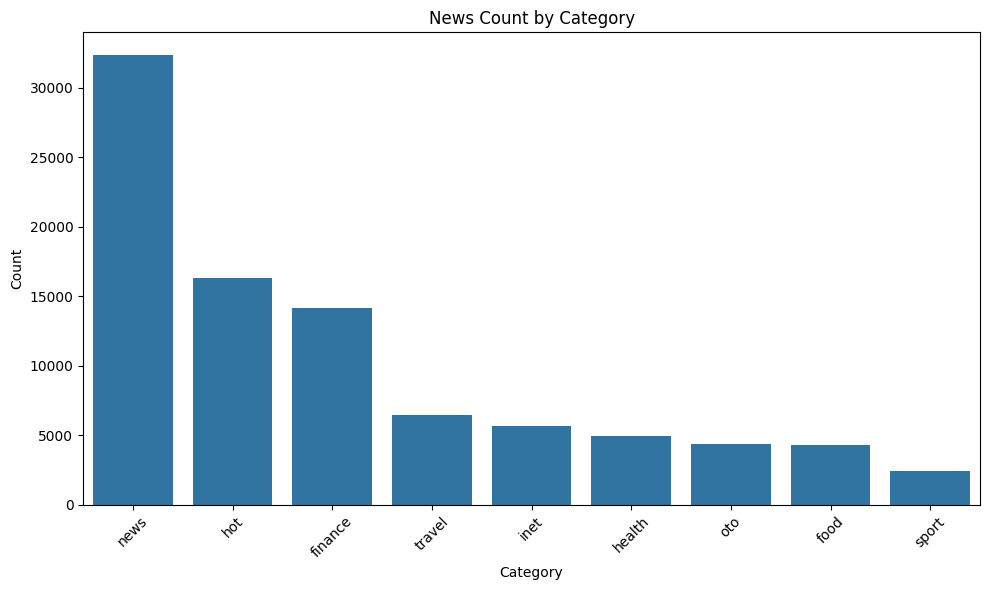

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=news, x='category', order=news['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('News Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Data Preparation

## Cleaning

In [20]:
# cleaning column
news = news.drop(columns=['url'])

In [ ]:
# null values

## Transformation

In [ ]:
#apakah ini udah bener? bakalan ganti gak tuh format datanya
news['date'] = pd.to_datetime(news['date'], format='%m/%d/%Y')
news['date'] = news['date'].dt.strftime('%Y-%m-%d')
#oh bener bisa kerubah

In [ ]:
news 

,date,url,title,category
0,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,2020-02-26,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,2020-02-26,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
...,...,...,...,...
91012,2020-02-03,https://travel.detik.com/travel-news/d-4882807...,"Ketumpahan Air Panas di Pesawat, Kamu Bisa Tun...",travel
91013,2020-02-03,https://travel.detik.com/fototravel/d-4882796/...,Foto: Bali & 9 Destinasi Paling Instagramable ...,travel
91014,2020-02-03,https://travel.detik.com/travel-news/d-4882794...,Game Bikin Turis Ini Liburan ke Jepang untuk.....,travel
91015,2020-02-03,https://travel.detik.com/travel-news/d-4882792...,"Sekeluarga Didepak dari Pesawat, Maskapai Bila...",travel


In [ ]:
print(f"Date range in ina_news: {ina_news['date'].min()} to {ina_news['date'].max()}")


Date range in ina_news: 2020-01-01 to 2020-06-13


In [ ]:
idx_parsial['datetime'].min(), idx_parsial['datetime'].max()

('2005-06-30 02:00:00', '2025-07-04 02:00:00')

# Feature Engineering

## Convert Datetime

In [ ]:
# Convert 'datetime' to datetime type and extract date 
idx_parsial_with_date = idx_parsial.copy()
idx_parsial_with_date['date'] = pd.to_datetime(idx_parsial_with_date['datetime']).dt.date
pd.set_option('display.max_rows', None)
idx_parsial_with_date 

In [ ]:
#dari si ni belum kebayang euy kudu kumaha, mohon arahanna pak manipulasi data nya harus gimana
#kalau aku kebayangnya inituh gini : 
#1. ubah format tanggal di ina_news dan idx_parsial_with_date supaya sama
#2. Setelah ada hubungan antara dua tabel itu, kita bisa join berdasarkan tanggal
#3. Belum kebayang bikin modelnya gimana pak caranya

In [ ]:
# Check if there are any 2020 dates in idx_parsial_with_date
has_2020 = idx_parsial_with_date['date'].astype(str).str.startswith('2020').any()

print("Contains 2020 data:", has_2020)

In [ ]:
#Make the idx_parsial_with_date to have the same date range as ina_news
date_range = pd.date_range(start=ina_news['date'].min(), end=ina_news['date'].max())
idx_parsial_with_date = idx_parsial_with_date[idx_parsial_with_date['date'].isin(date_range)]
idx_parsial_with_date

# stuck on this part, kenapa kaga bisa join yo? padahal data nya udah pasti ada 2020 
#oh jawabannya ketemu, bentuk dari data date nya beda.